In [1]:
import os

import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
list_photos = []

In [3]:
for file_name in os.listdir('exp1'):
    list_photos.append(cv2.imread(os.path.join('exp1', file_name),  cv2.IMREAD_COLOR))

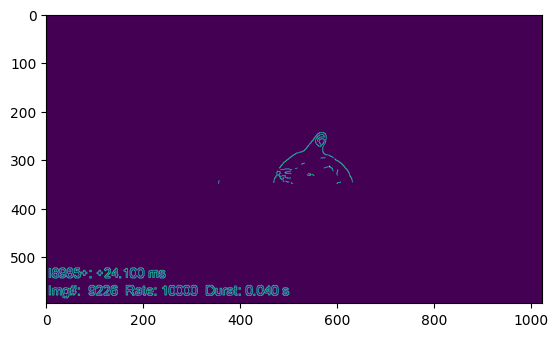

In [6]:
# Load the image
img = list_photos[80]

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blurring to remove noise
blur = cv2.GaussianBlur(gray, (7,7), 0)

# Apply Canny edge detection
edges = cv2.Canny(blur, 200, 230)

# Display the results
plt.imshow(edges)

In [5]:
def shaded_contours(zeroes, min_area=0, max_area = 10000):
    # Convert the input image to 8-bit grayscale
    gray = cv2.cvtColor(np.uint8(zeroes), cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blurring to remove noise
    blur = cv2.GaussianBlur(gray, (7,7), 0)

    # Apply Canny edge detection with the current parameters
    edges = cv2.Canny(blur, 100, 200)

    # Perform closing operation to close the contour
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

    # Dilate the contours
    kernel = np.ones((5,5), np.uint8)
    dilated = cv2.dilate(closed, kernel, iterations=3)

    # Find the contours in the binary image
    contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a new black image with the same shape as the input
    shaded = np.zeros(zeroes.shape)

    # Loop through each contour and draw it filled in white on the shaded image
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > min_area and area < max_area:
            cv2.drawContours(shaded, [contour], 0, (255, 255, 255), -1)

    # Add the shaded image to the original image with alpha blending

    return shaded


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


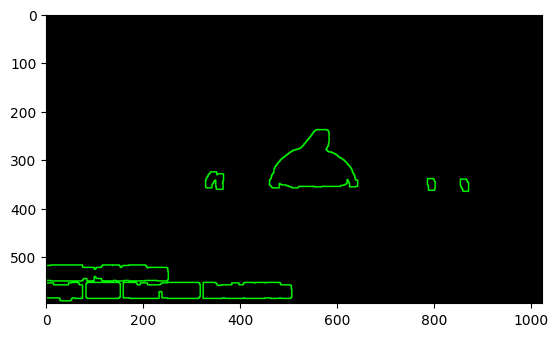

In [8]:
# Apply Gaussian blurring to remove noise
blur = cv2.GaussianBlur(gray, (7,7), 0)

# Apply Canny edge detection with the current parameters
edges = cv2.Canny(blur, 100, 200)

# Perform closing operation to close the contour
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Dilate the contours
kernel = np.ones((5,5), np.uint8)
dilated = cv2.dilate(closed, kernel, iterations=3)

# Find the contours in the binary image
contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on a copy of the original image
contour_img = img.copy()
zeroes = np.zeros(contour_img.shape)
cv2.drawContours(zeroes, contours, -1, (0, 255, 0), 2)


# Display the results with the current parameters
plt.imshow(zeroes)
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


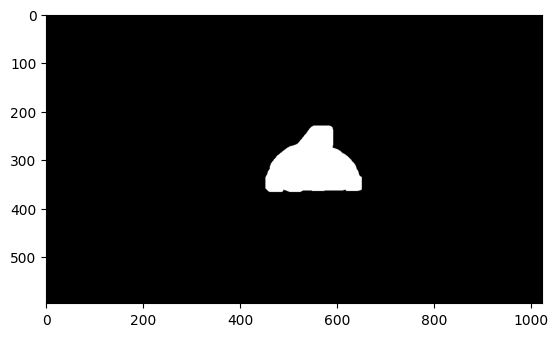

In [9]:

new_img = shaded_contours(zeroes, 10000, 20000)
plt.imshow(new_img)
plt.show()

In [10]:
c_0 = contours[0]# image moment
M = cv2.moments(c_0)
print(M.keys())

dict_keys(['m00', 'm10', 'm01', 'm20', 'm11', 'm02', 'm30', 'm21', 'm12', 'm03', 'mu20', 'mu11', 'mu02', 'mu30', 'mu21', 'mu12', 'mu03', 'nu20', 'nu11', 'nu02', 'nu30', 'nu21', 'nu12', 'nu03'])


# test all images

In [10]:
for i in list_photos:
    # Load the image
    img = i

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blurring to remove noise
    blur = cv2.GaussianBlur(gray, (7,7), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blur, 200, 230)

    # Apply Gaussian blurring to remove noise
    blur = cv2.GaussianBlur(gray, (7,7), 0)

    # Apply Canny edge detection with the current parameters
    edges = cv2.Canny(blur, 100, 200)

    # Perform closing operation to close the contour
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

    # Dilate the contours
    kernel = np.ones((5,5), np.uint8)
    dilated = cv2.dilate(closed, kernel, iterations=3)

    # Find the contours in the binary image
    contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw the contours on a copy of the original image
    contour_img = img.copy()
    zeroes = np.zeros(contour_img.shape)
    cv2.drawContours(zeroes, contours, -1, (0, 255, 0), 2)



    new_img = shaded_contours(zeroes, 10000, 20000)
    new_img = cv2.GaussianBlur(new_img, (7,7), 0)

    plt.imshow(new_img)
    plt.show()

KeyboardInterrupt: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (546, 289)


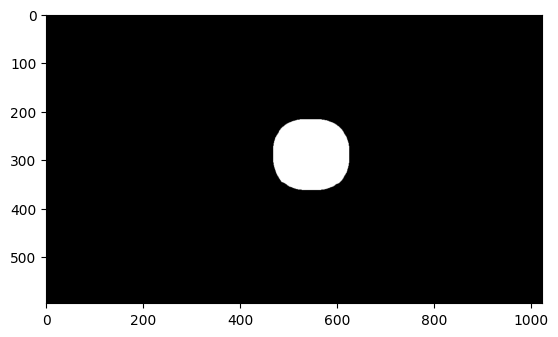

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (546, 291)


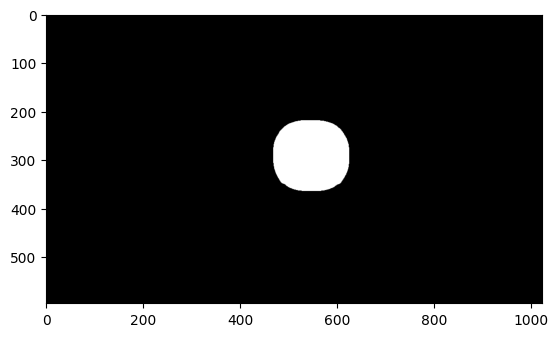

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (546, 293)


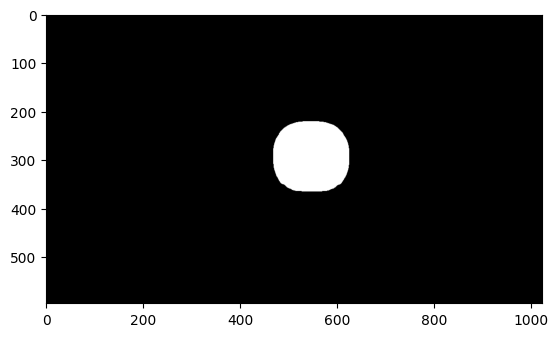

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (546, 295)


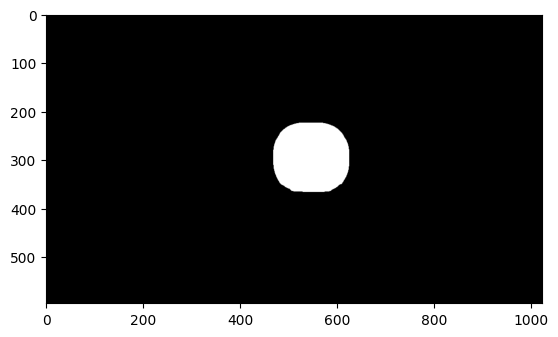

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (546, 297)


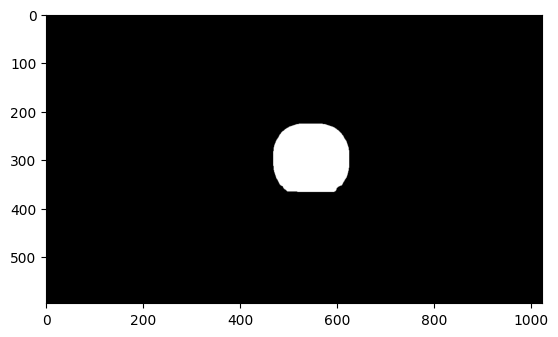

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (547, 299)


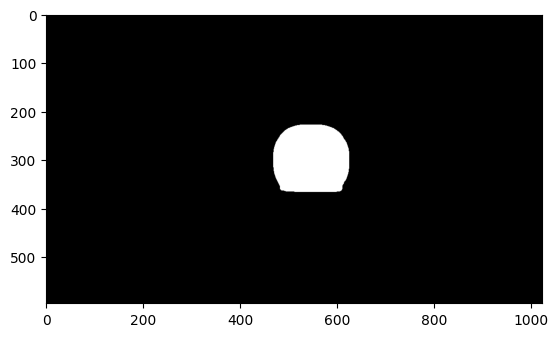

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (550, 307)


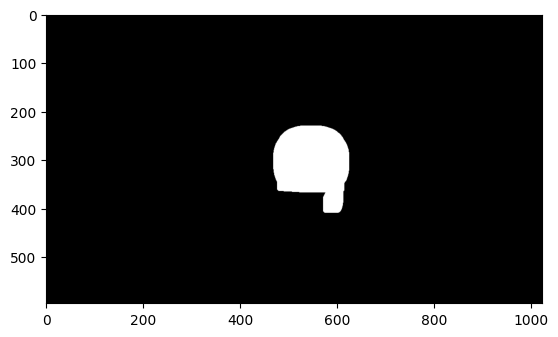

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (550, 309)


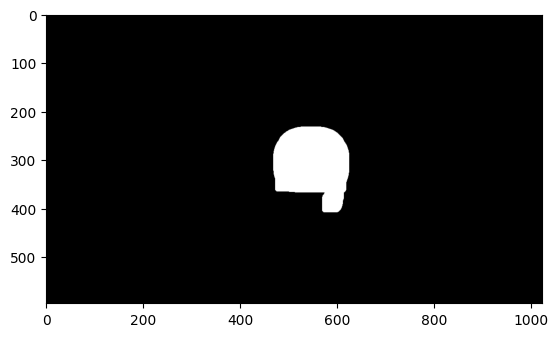

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (550, 311)


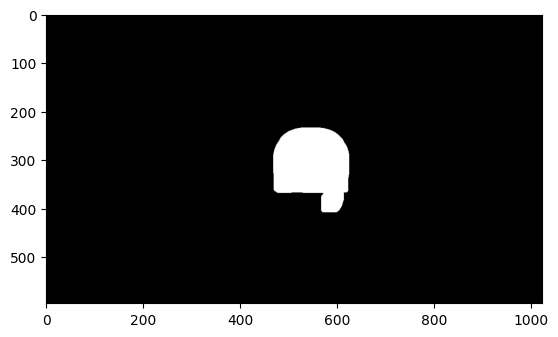

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (550, 313)


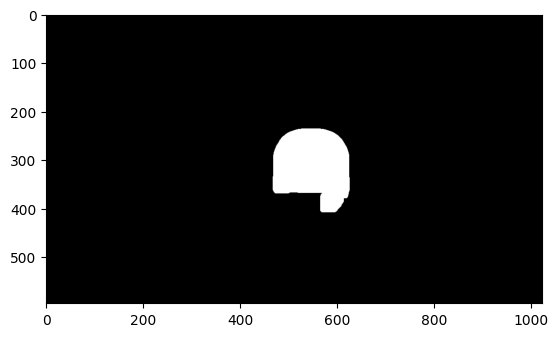

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (546, 308)


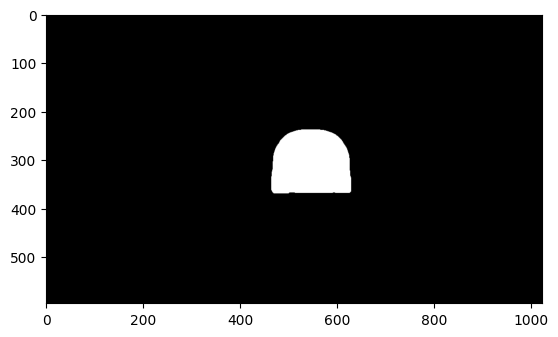

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (548, 311)


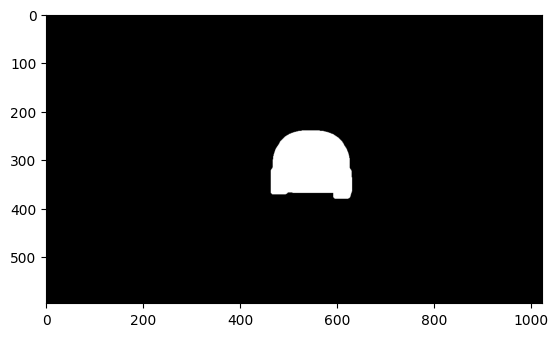

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (546, 311)


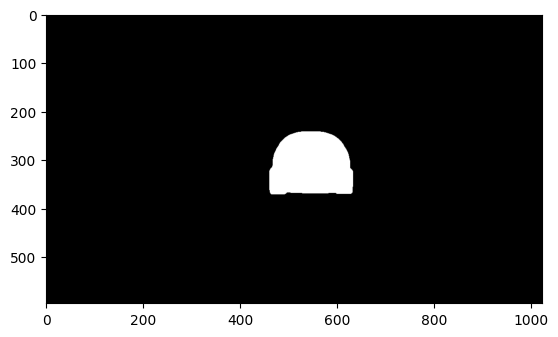

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (547, 313)


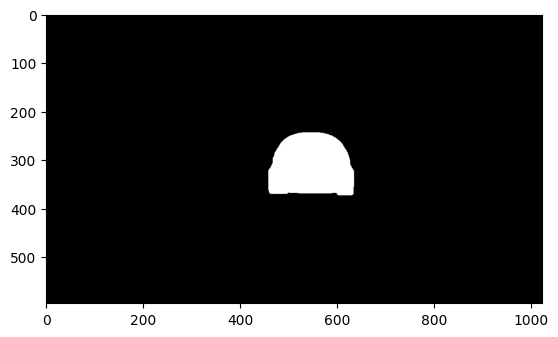

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (546, 314)


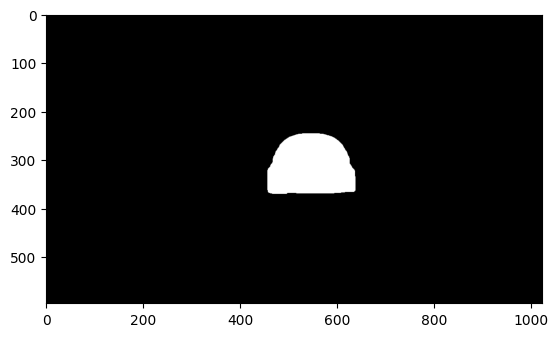

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (546, 315)


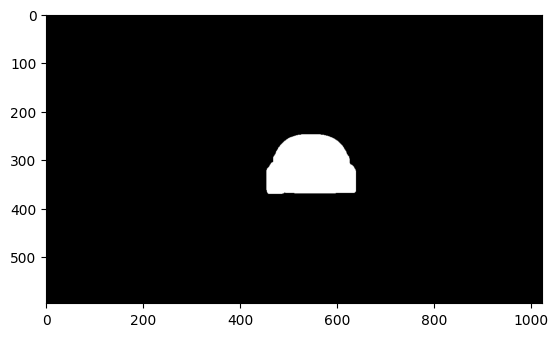

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (546, 316)


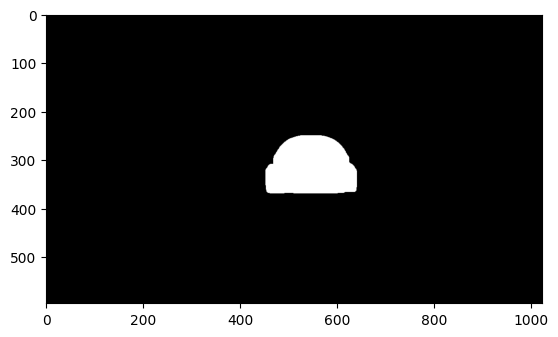

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (547, 317)


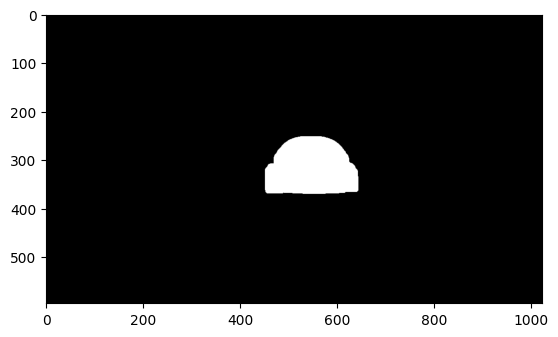

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (548, 319)


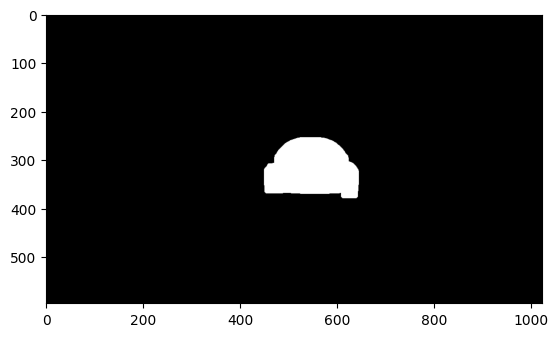

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (548, 320)


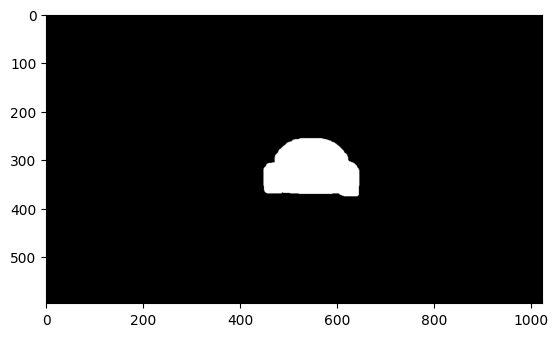

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (548, 321)


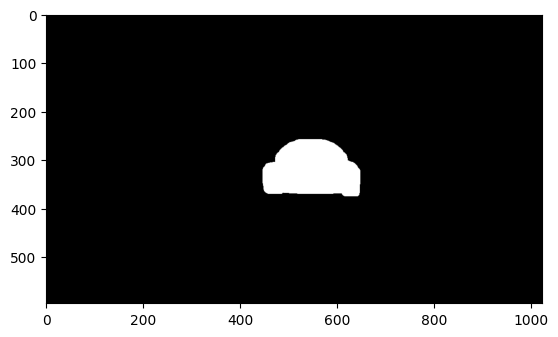

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (546, 321)


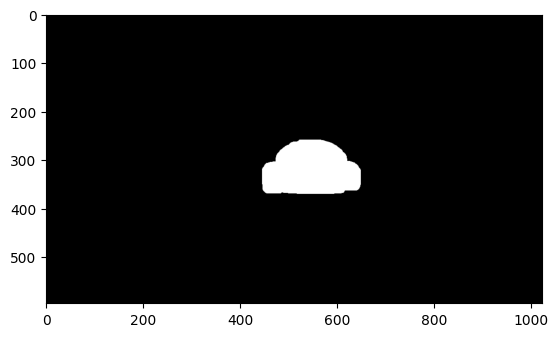

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (546, 321)


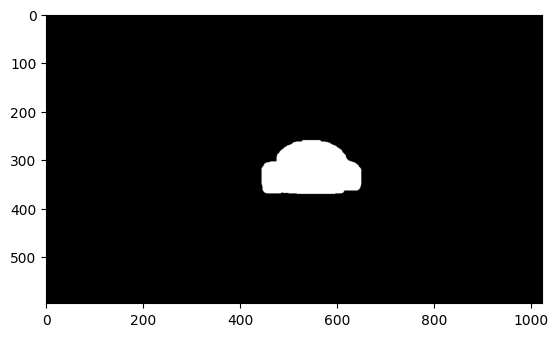

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (546, 322)


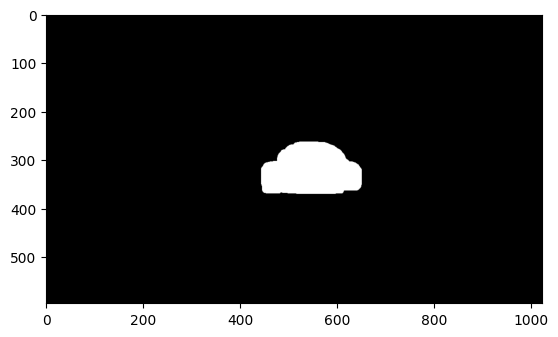

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (546, 323)


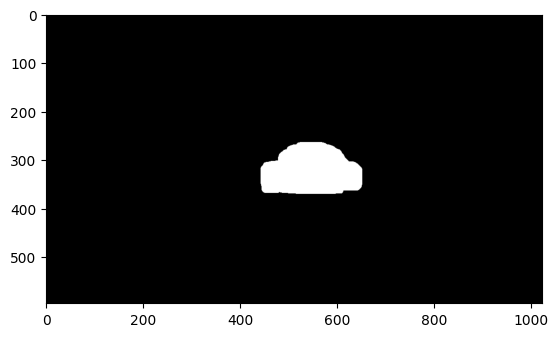

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (546, 324)


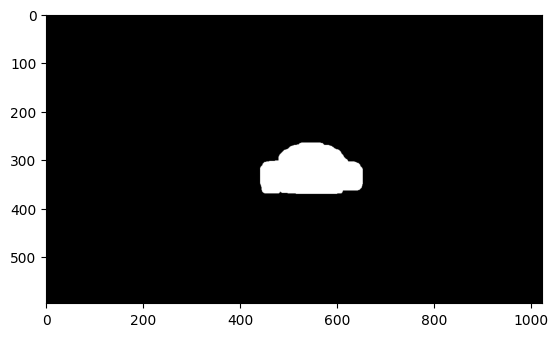

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (546, 324)


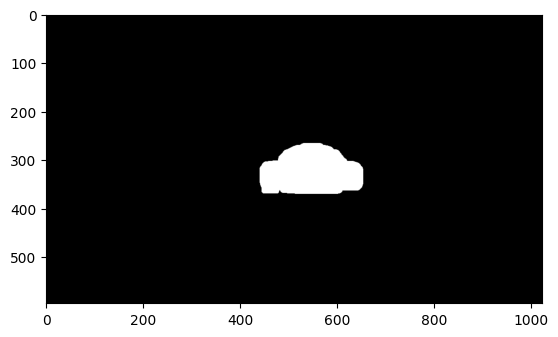

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (546, 325)


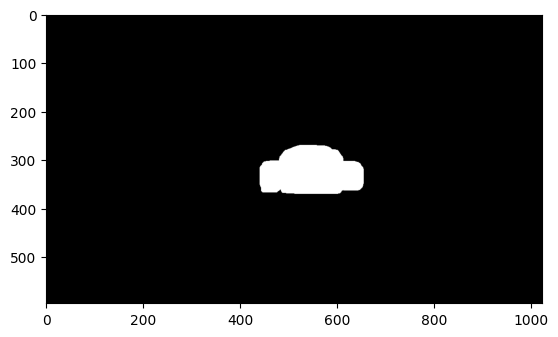

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (546, 325)


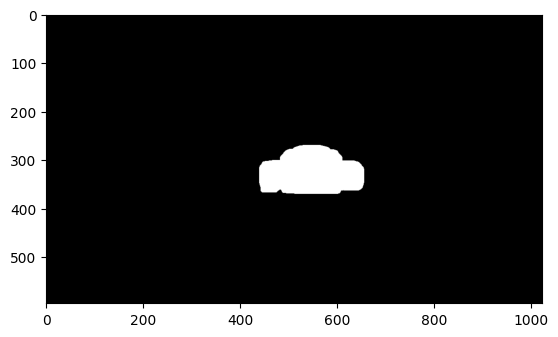

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (546, 326)


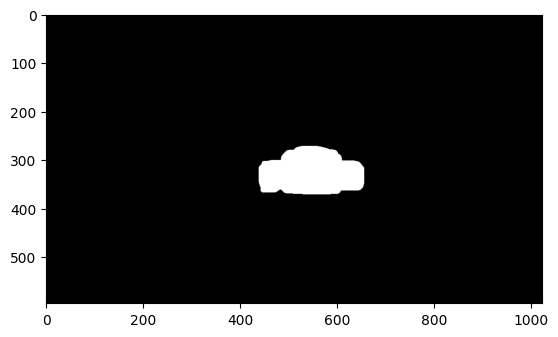

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (546, 327)


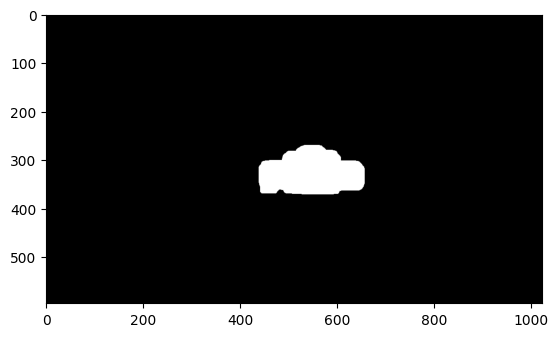

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (549, 328)


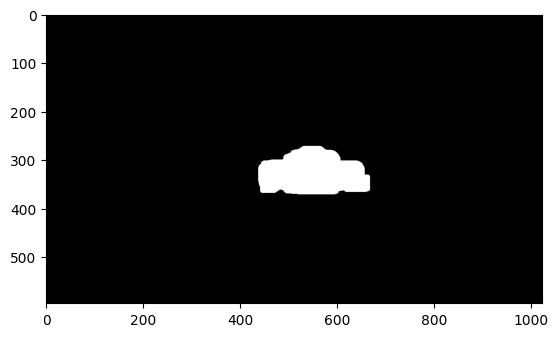

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (548, 328)


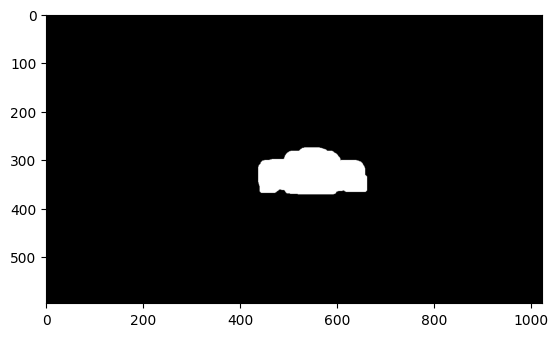

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (550, 328)


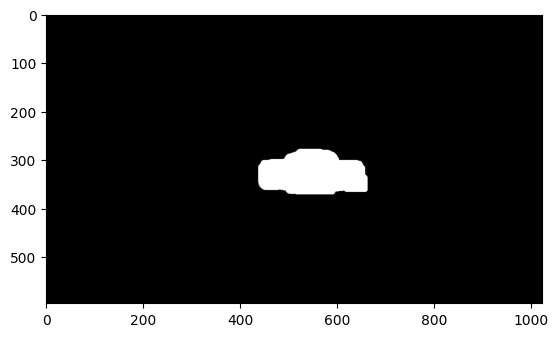

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (550, 329)


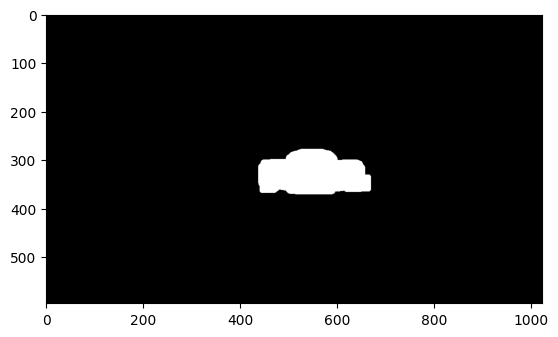

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (549, 329)


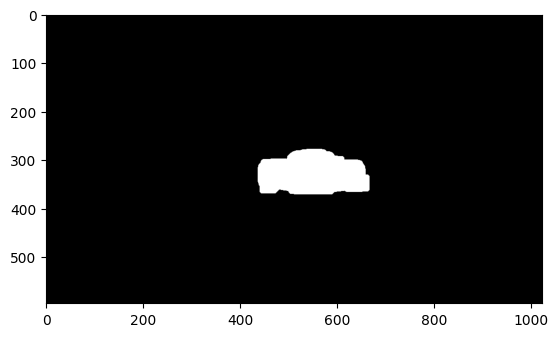

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (550, 329)


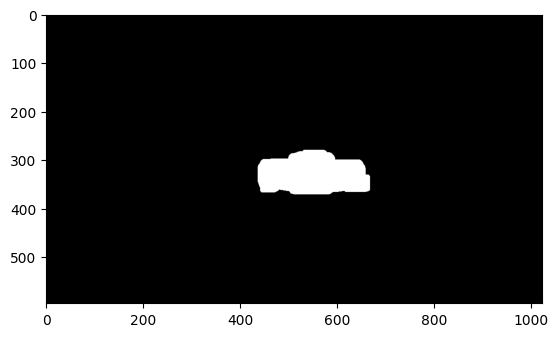

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (549, 329)


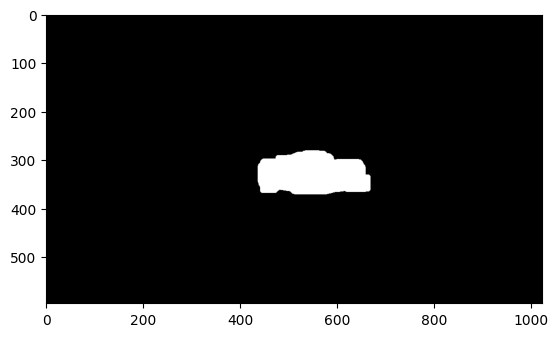

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (550, 330)


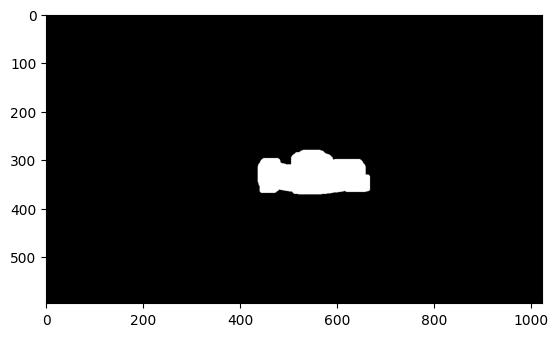

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (549, 328)


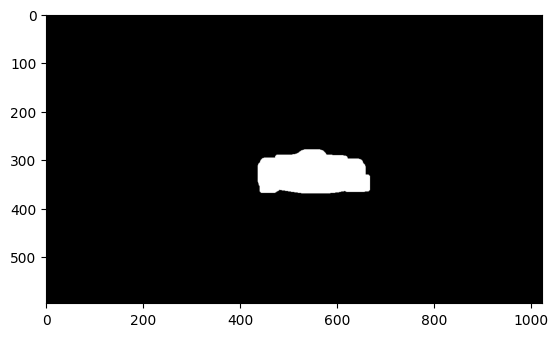

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (549, 328)


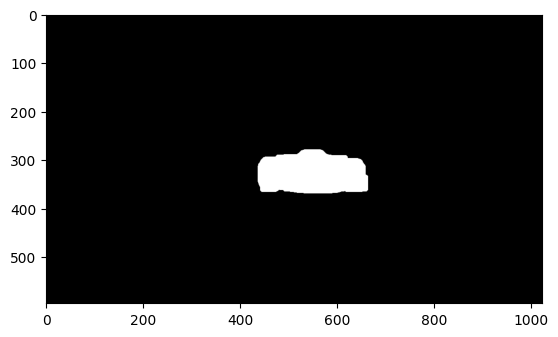

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (548, 329)


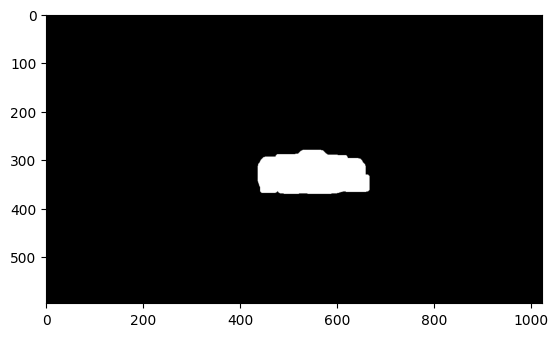

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (548, 328)


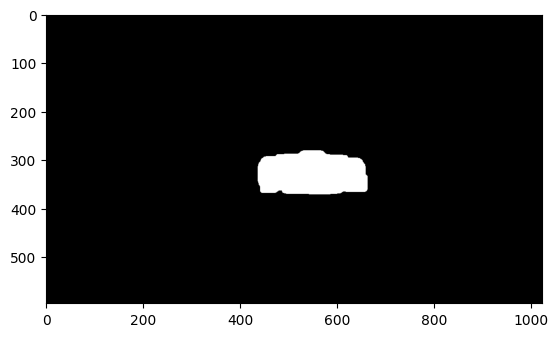

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (549, 329)


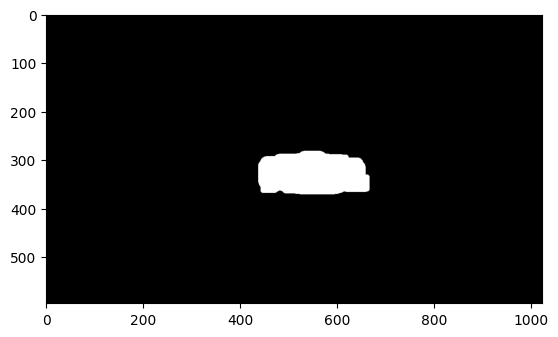

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (550, 329)


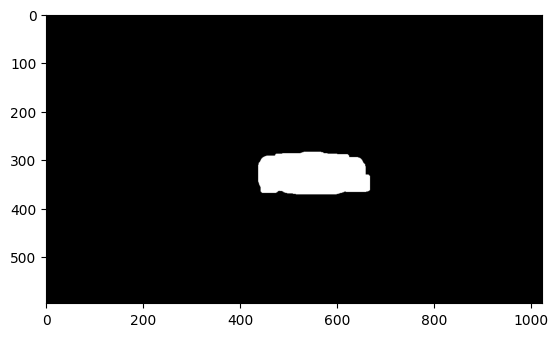

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (550, 329)


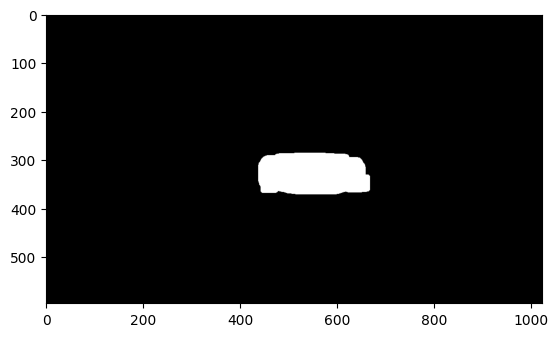

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (549, 329)


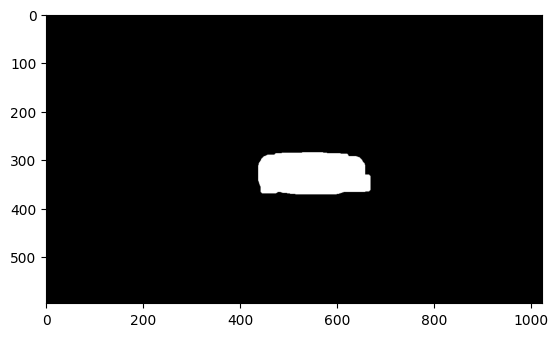

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (549, 329)


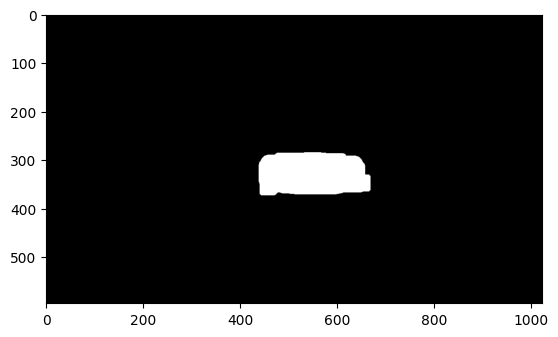

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (549, 328)


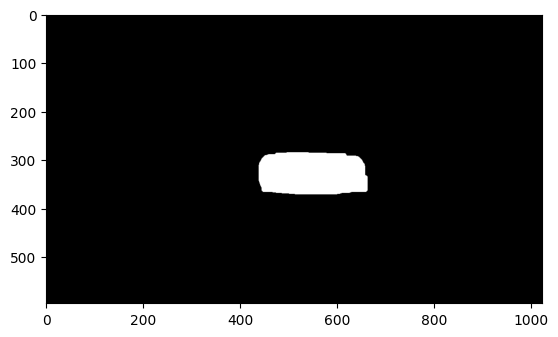

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (550, 329)


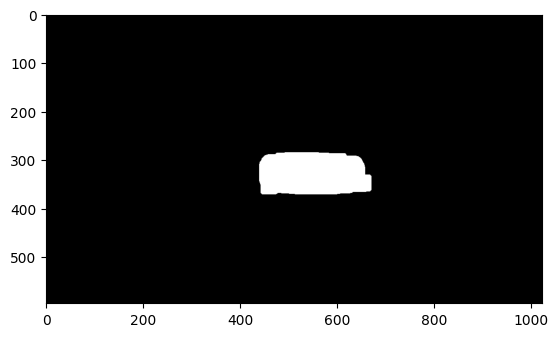

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (549, 328)


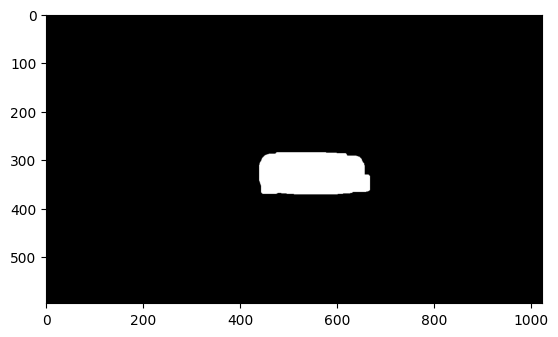

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (549, 328)


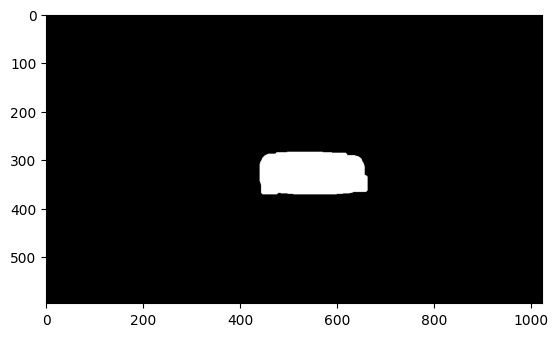

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (548, 328)


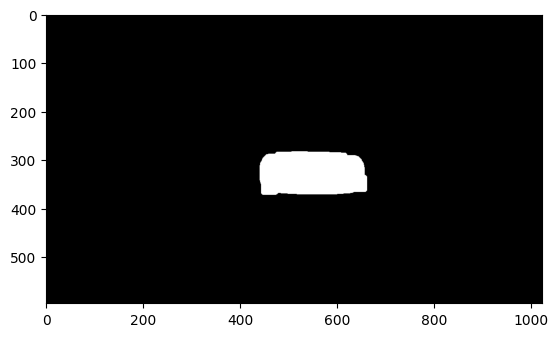

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (550, 328)


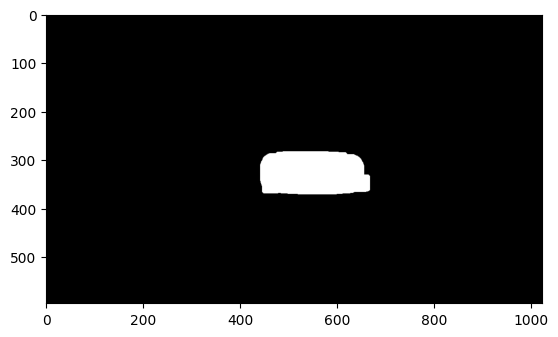

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (549, 327)


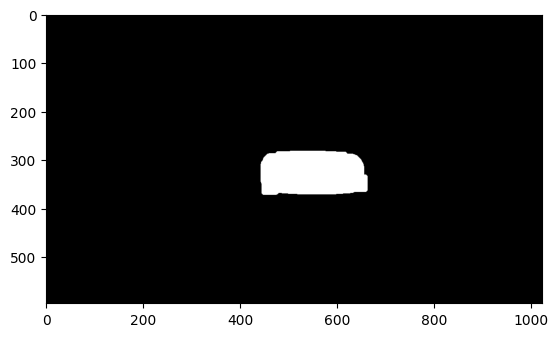

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (553, 331)


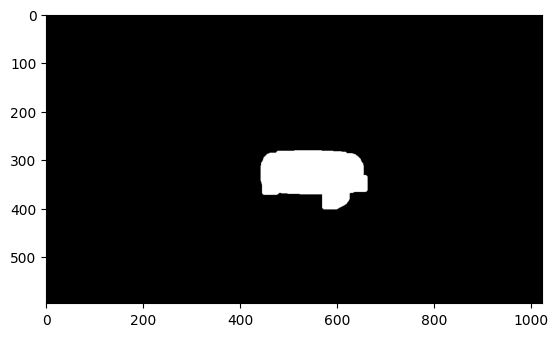

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (553, 331)


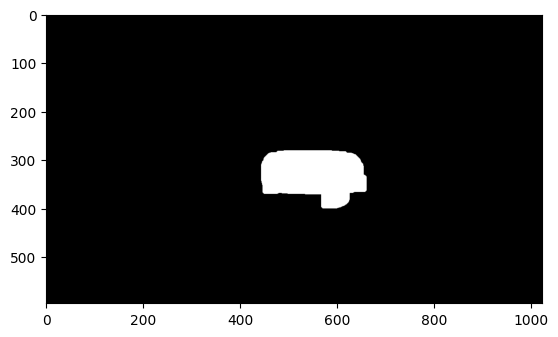

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (545, 331)


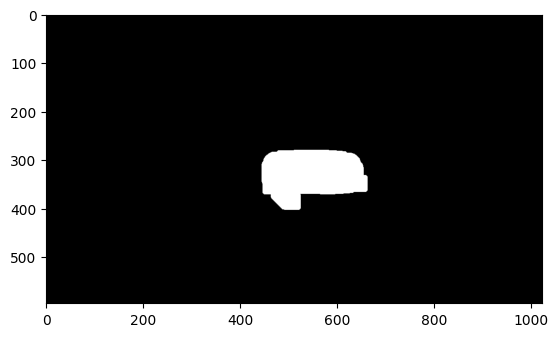

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (545, 331)


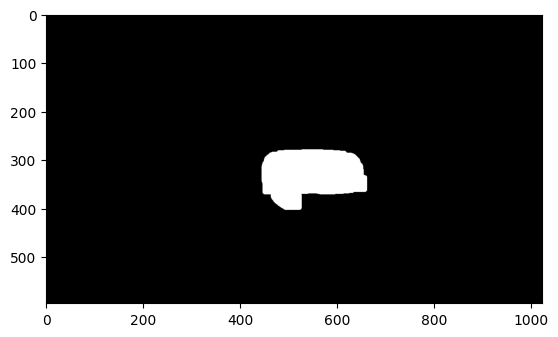

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (550, 326)


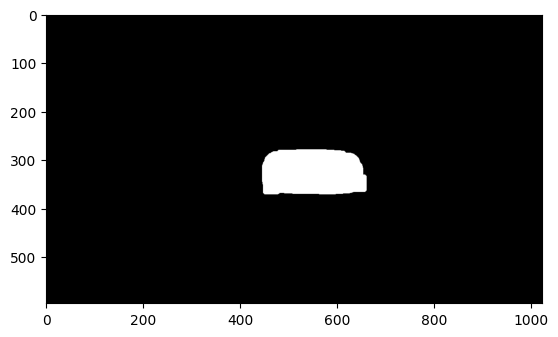

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (549, 326)


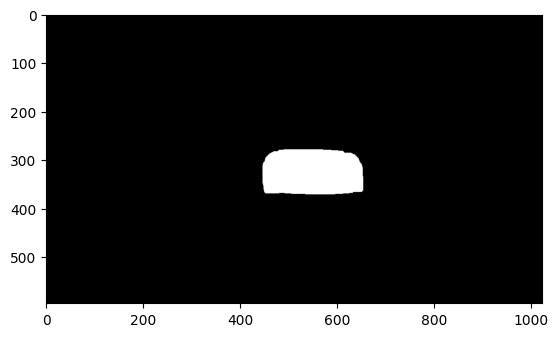

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (552, 327)


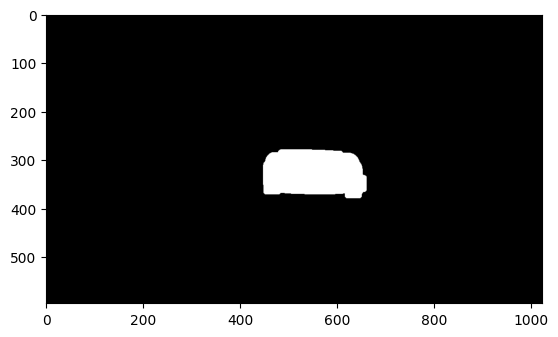

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (545, 332)


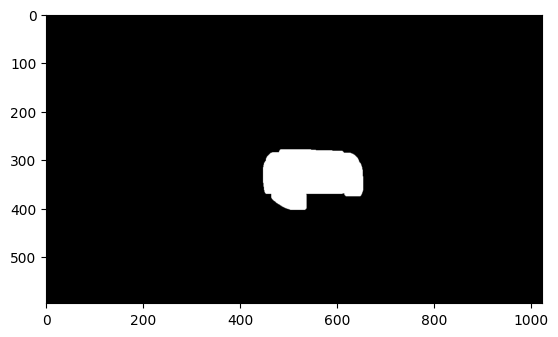

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (546, 332)


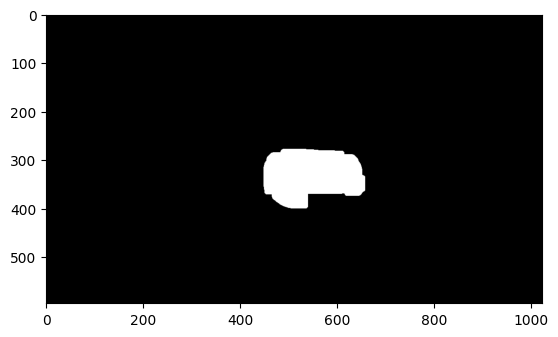

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (552, 327)


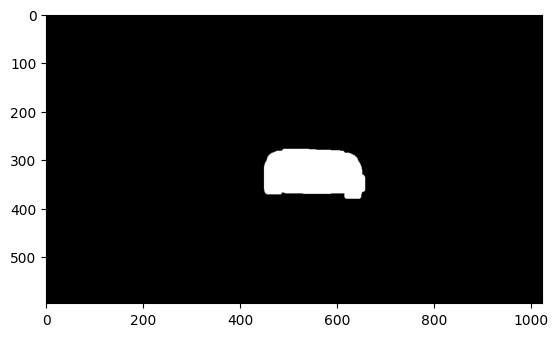

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (552, 326)


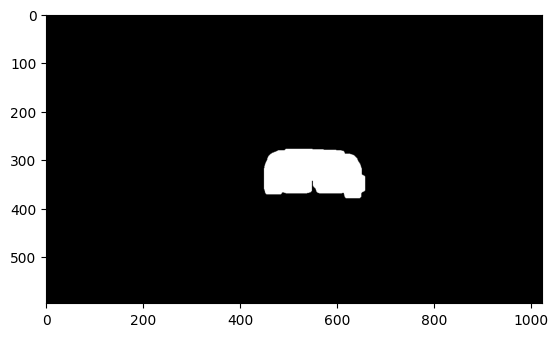

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (550, 325)


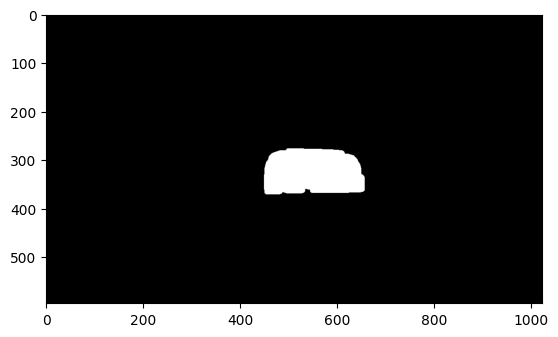

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (551, 326)


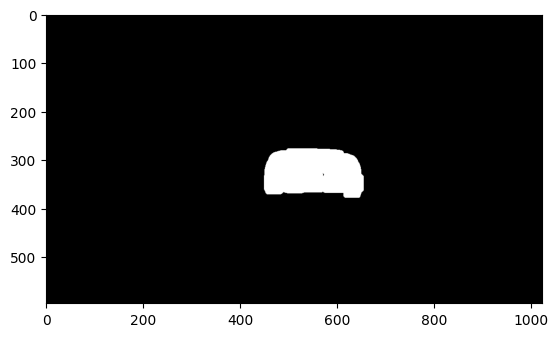

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (550, 325)


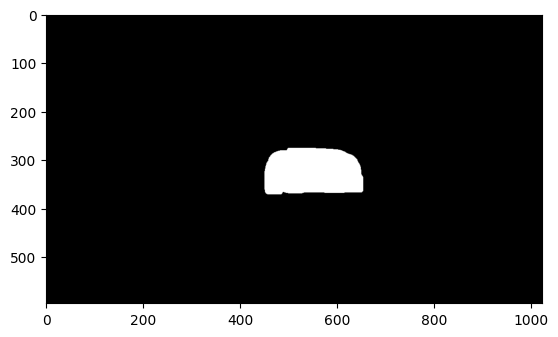

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (550, 324)


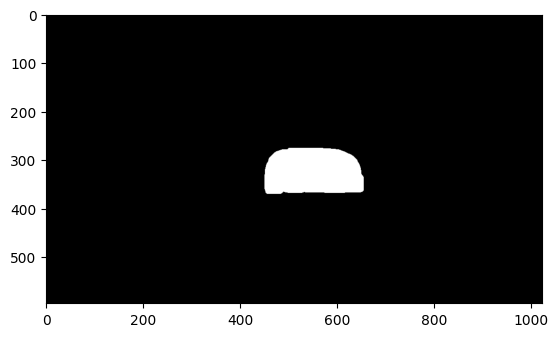

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (551, 324)


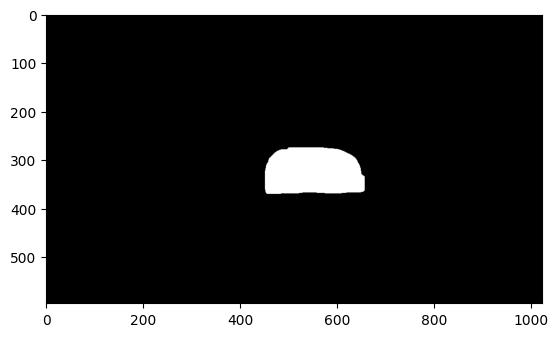

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (550, 324)


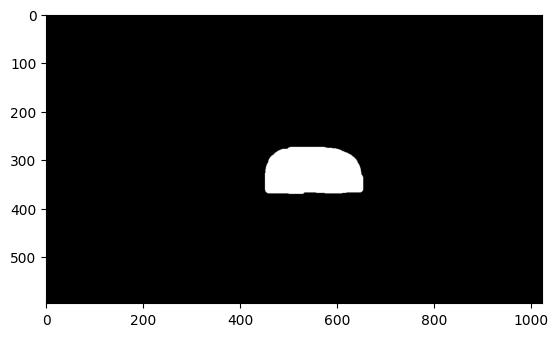

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (550, 323)


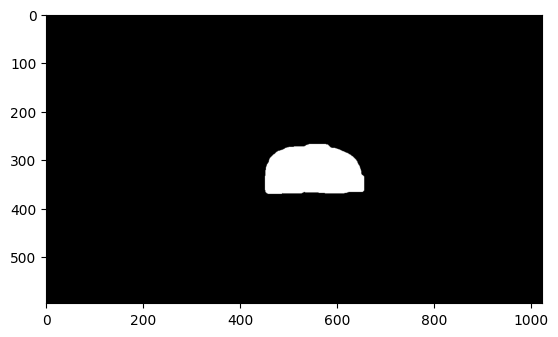

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (552, 322)


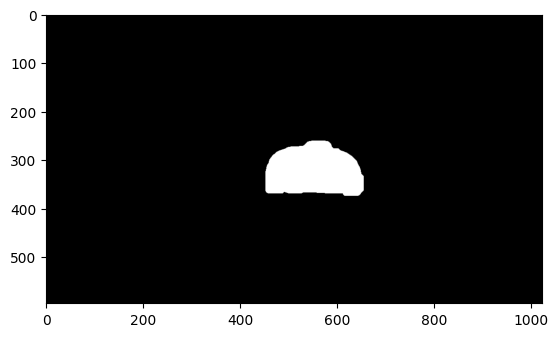

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (552, 321)


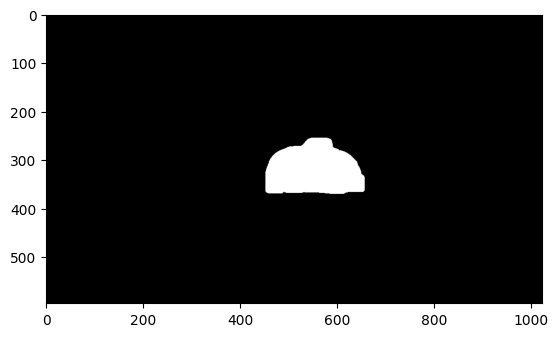

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (551, 319)


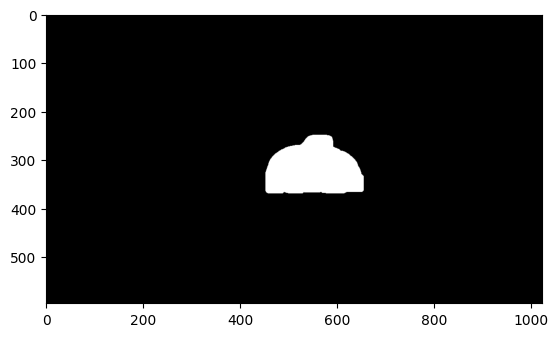

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (552, 318)


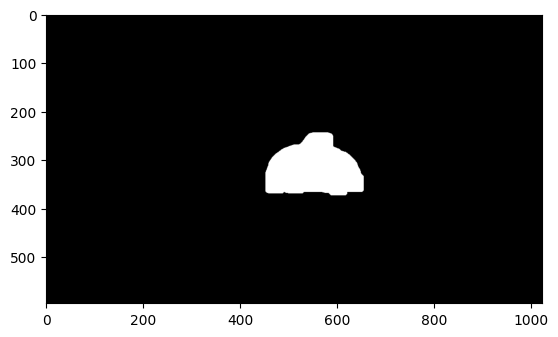

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (551, 316)


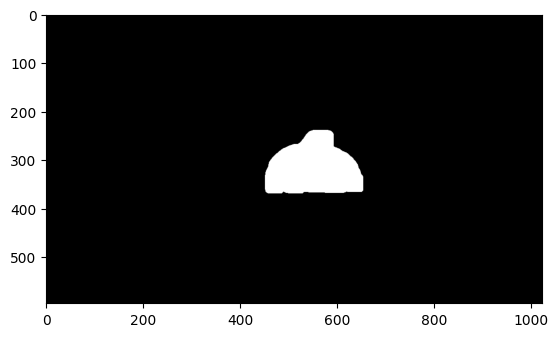

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (551, 315)


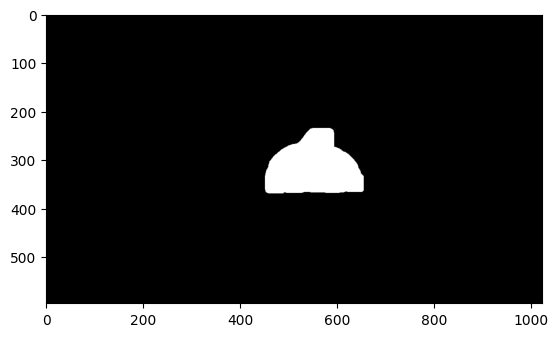

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (551, 314)


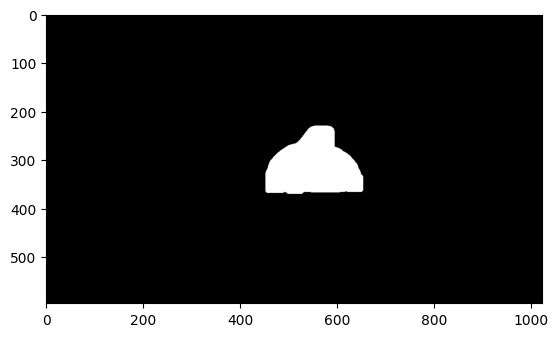

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (551, 313)


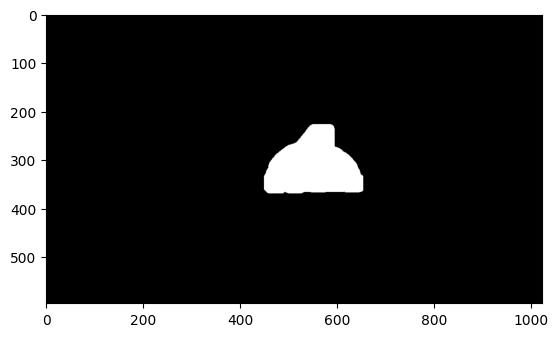

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (552, 312)


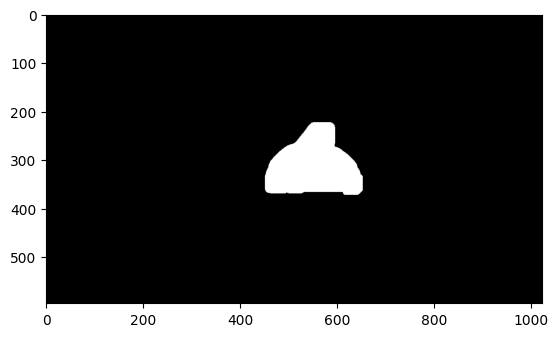

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (551, 310)


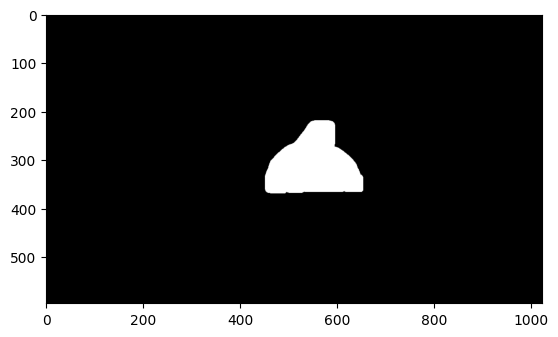

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (551, 309)


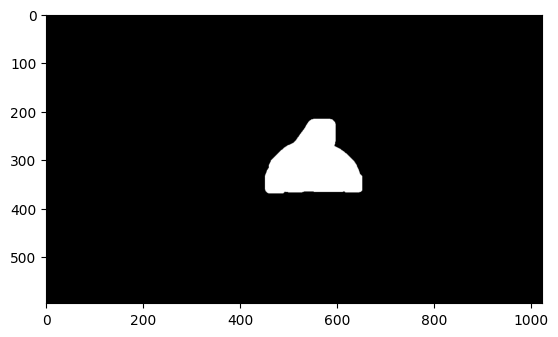

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (552, 307)


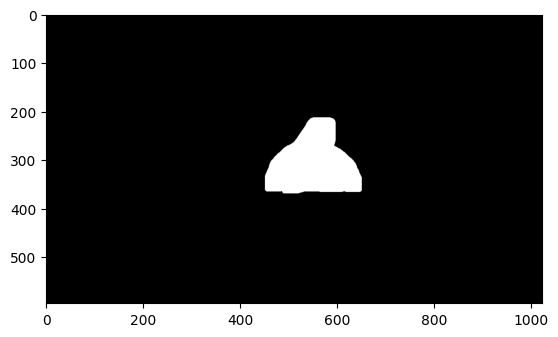

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (550, 304)


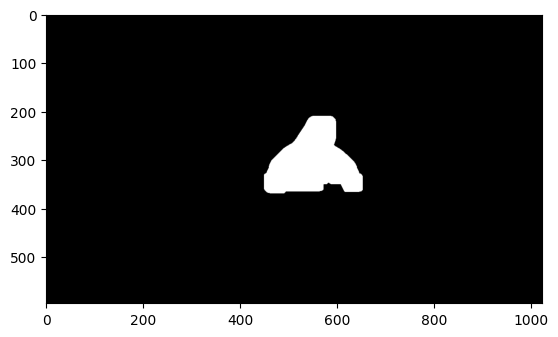

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (550, 303)


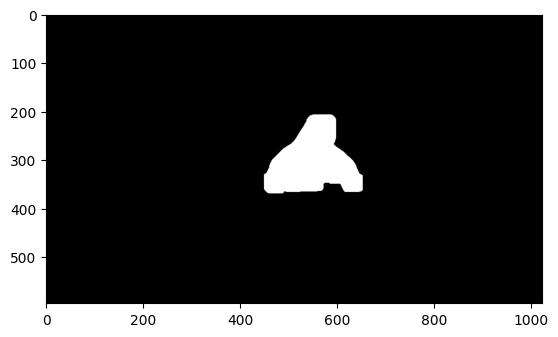

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (550, 303)


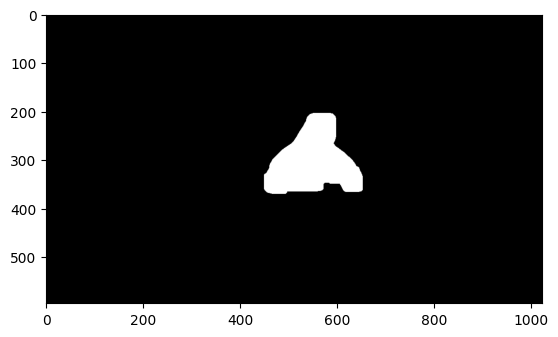

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (550, 302)


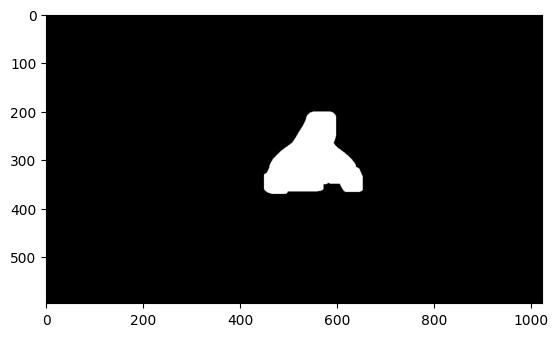

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (551, 298)


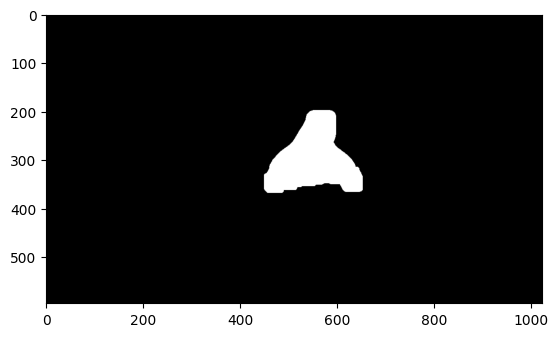

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (551, 298)


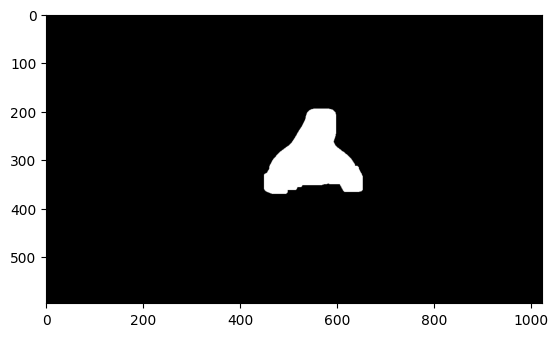

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (551, 297)


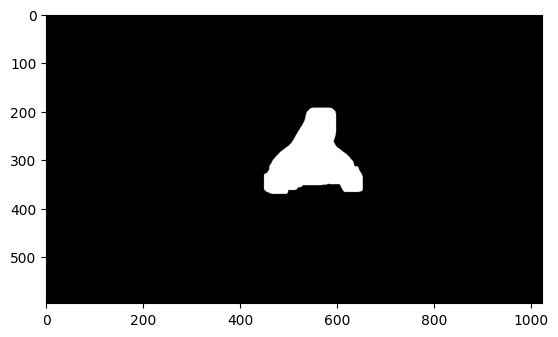

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (552, 295)


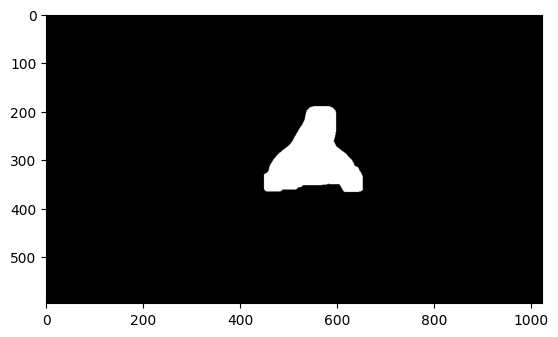

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (552, 294)


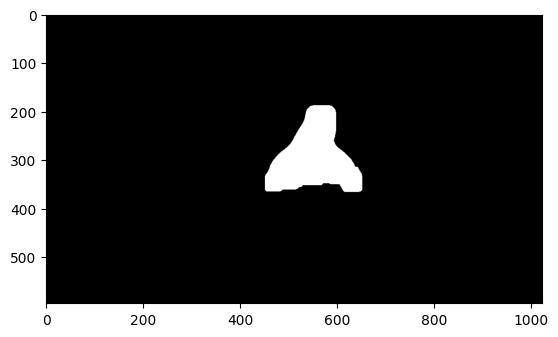

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (552, 294)


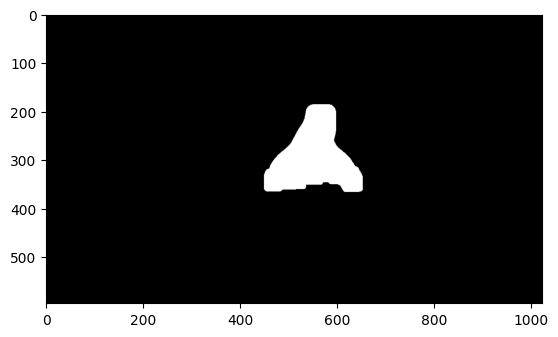

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (552, 295)


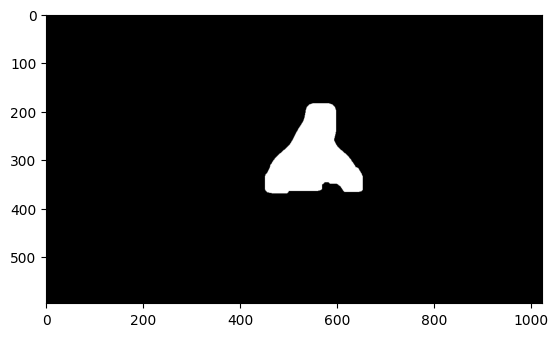

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (552, 294)


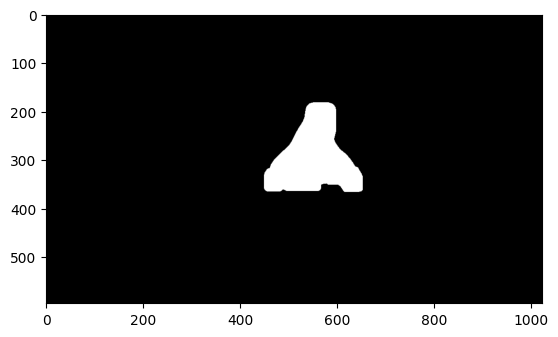

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (553, 291)


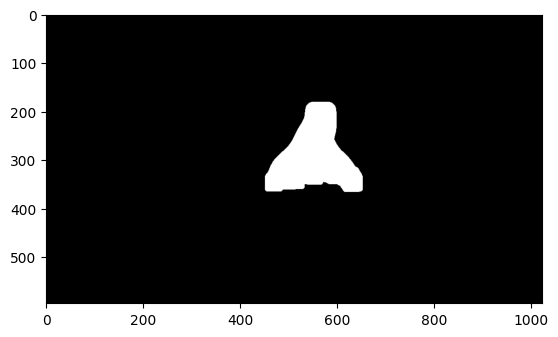

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (553, 291)


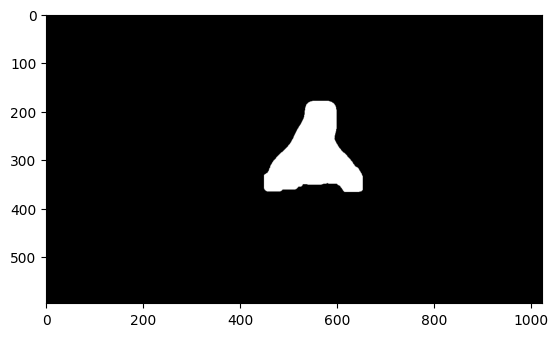

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (554, 289)


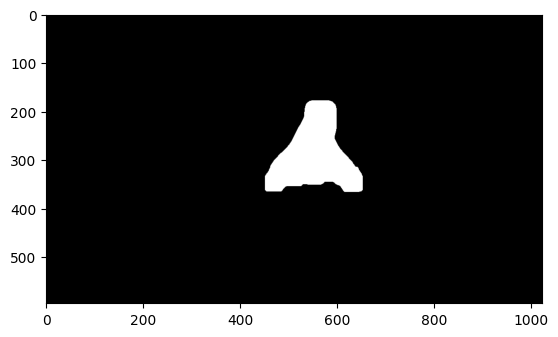

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (553, 289)


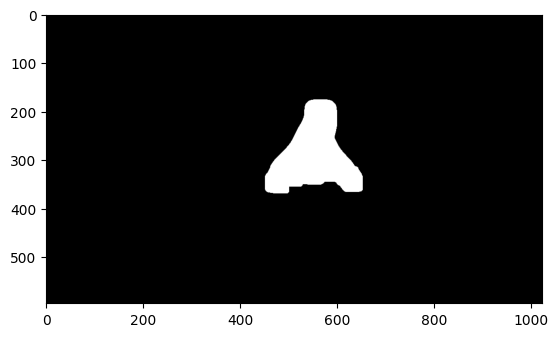

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (552, 288)


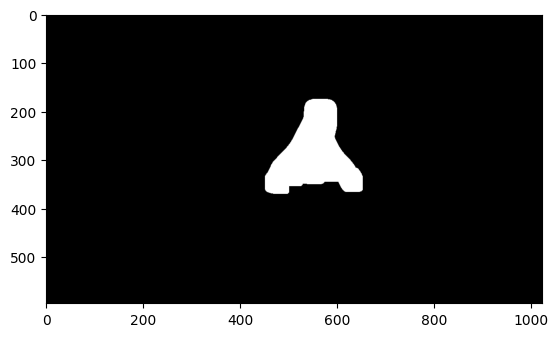

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (554, 287)


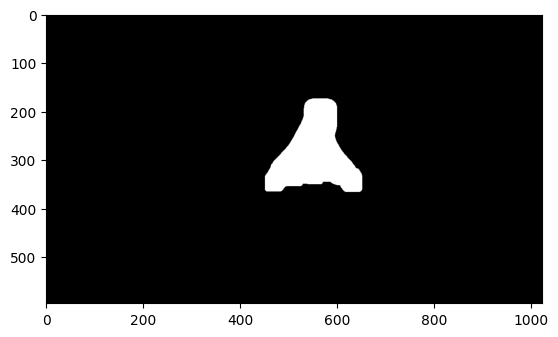

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (553, 287)


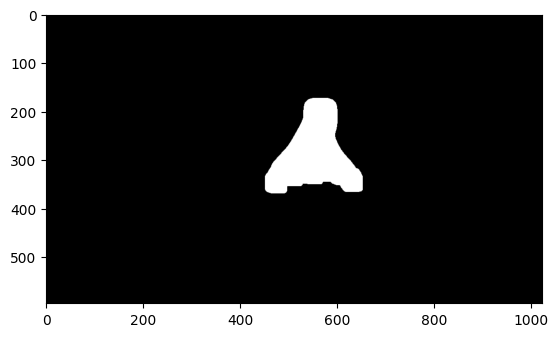

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (553, 287)


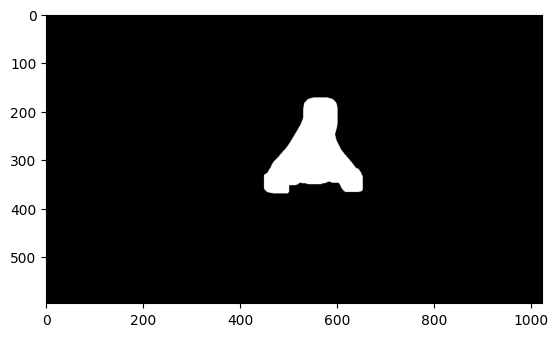

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (554, 286)


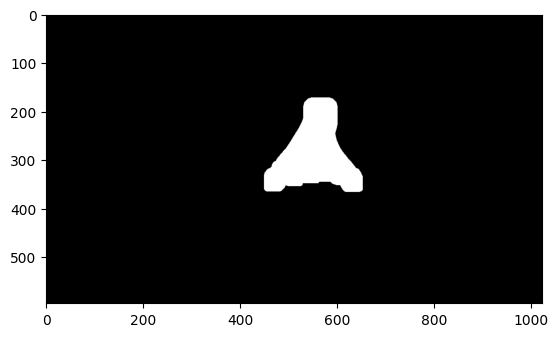

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (553, 286)


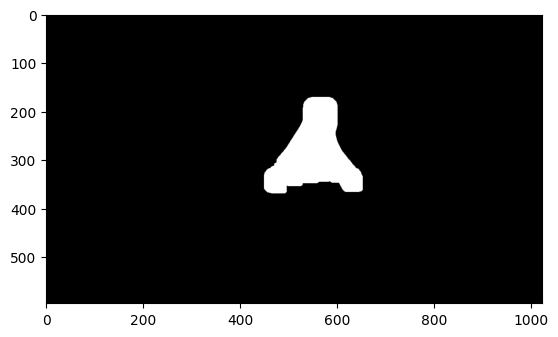

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (553, 286)


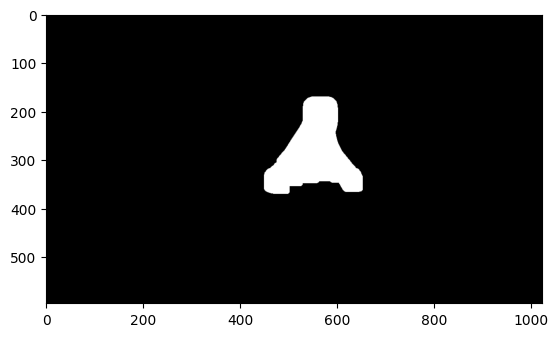

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (554, 284)


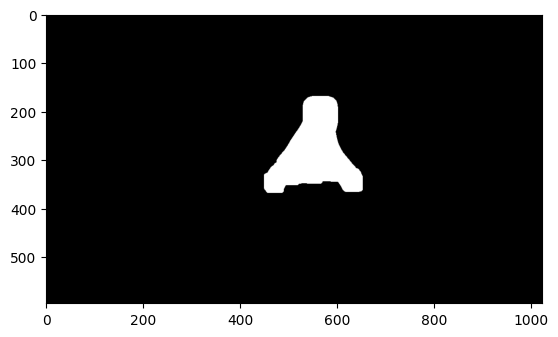

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (553, 285)


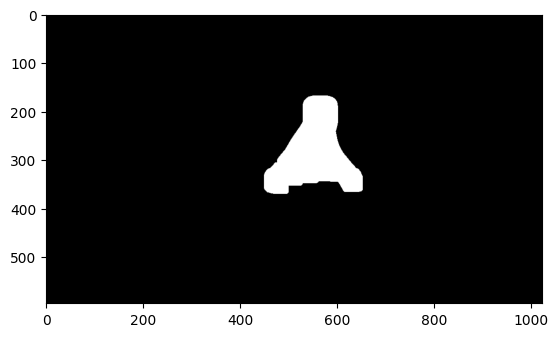

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (553, 284)


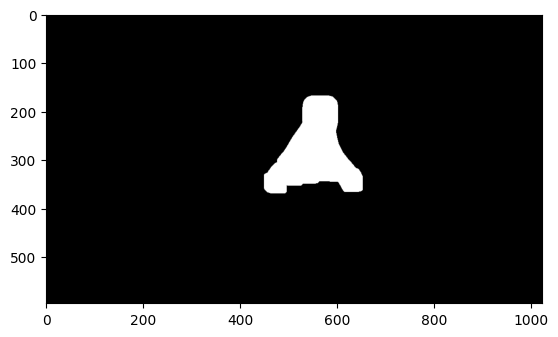

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (553, 284)


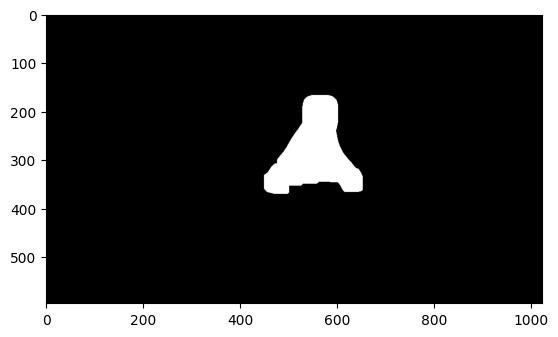

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (554, 283)


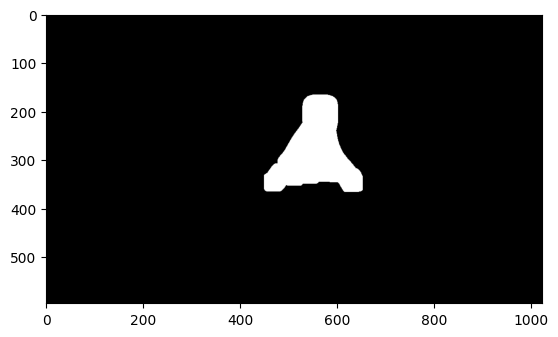

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (554, 283)


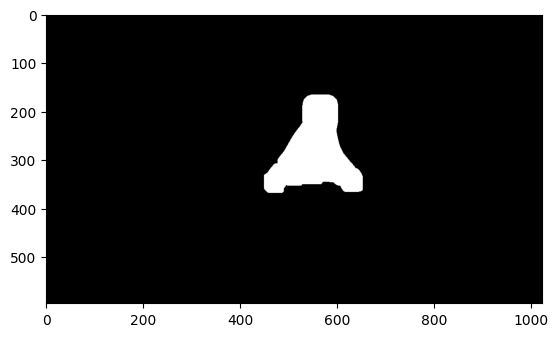

Center of mass: (0, 0)


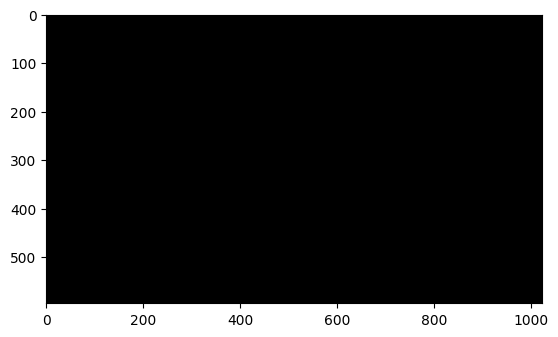

Center of mass: (0, 0)


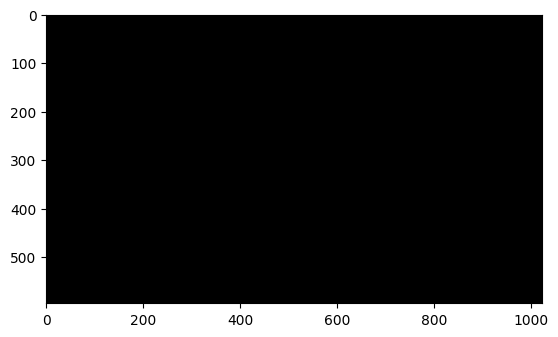

Center of mass: (0, 0)


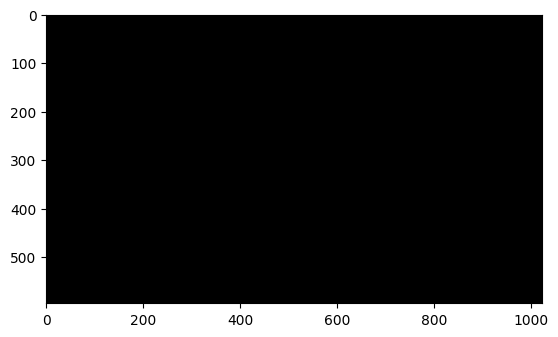

Center of mass: (0, 0)


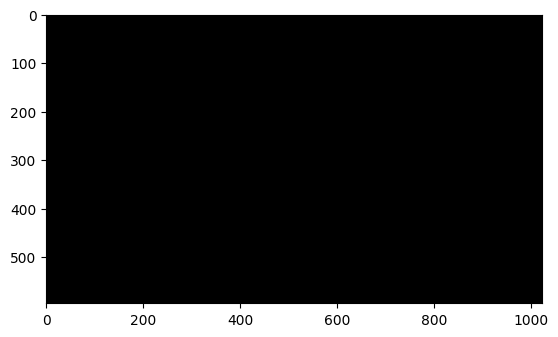

Center of mass: (0, 0)


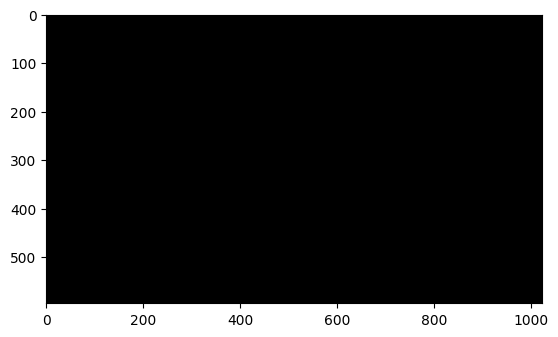

Center of mass: (0, 0)


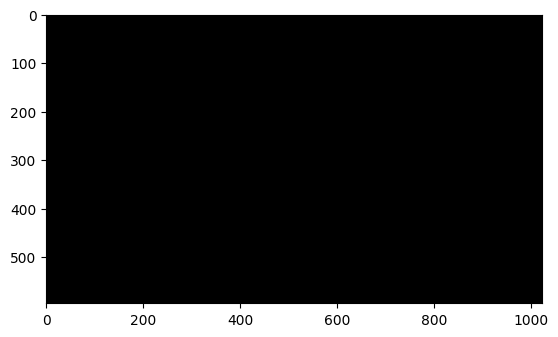

Center of mass: (0, 0)


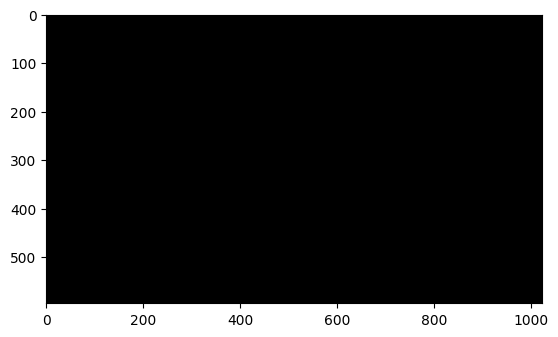

Center of mass: (0, 0)


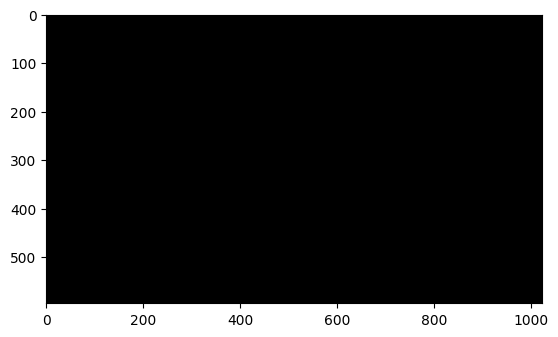

Center of mass: (0, 0)


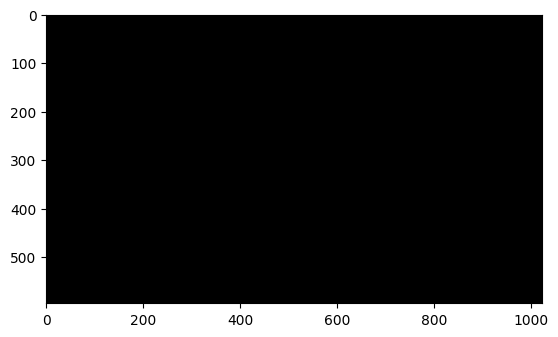

Center of mass: (0, 0)


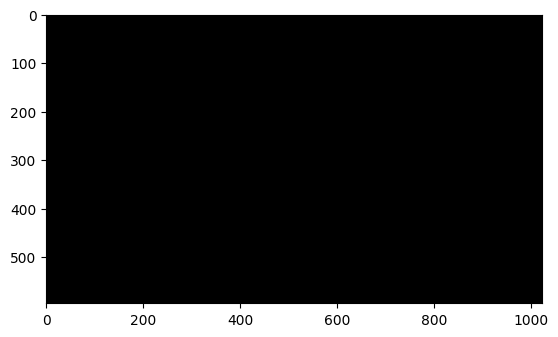

Center of mass: (0, 0)


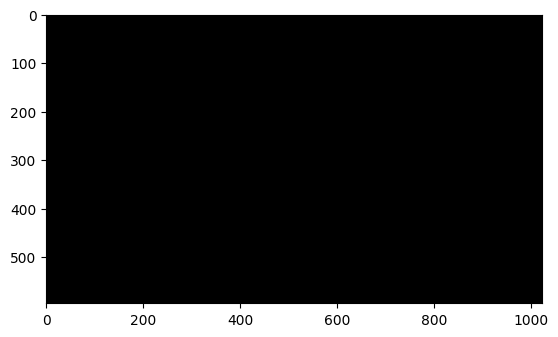

Center of mass: (0, 0)


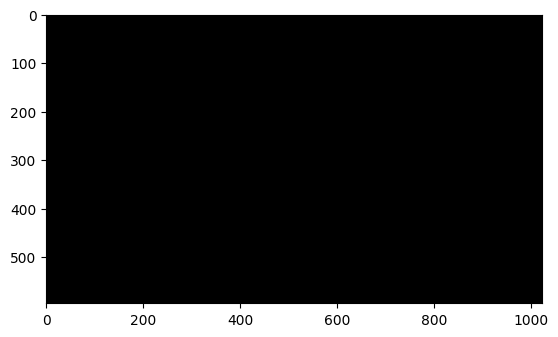

Center of mass: (0, 0)


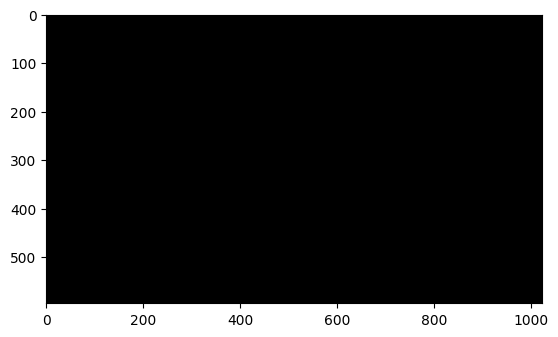

Center of mass: (0, 0)


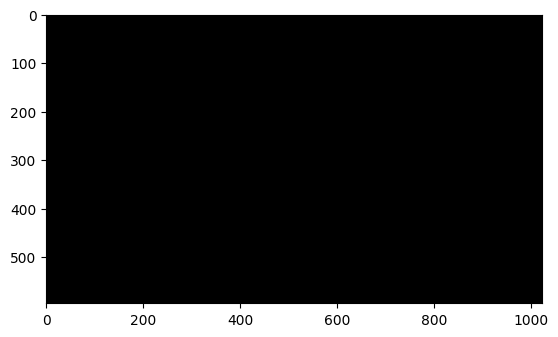

Center of mass: (0, 0)


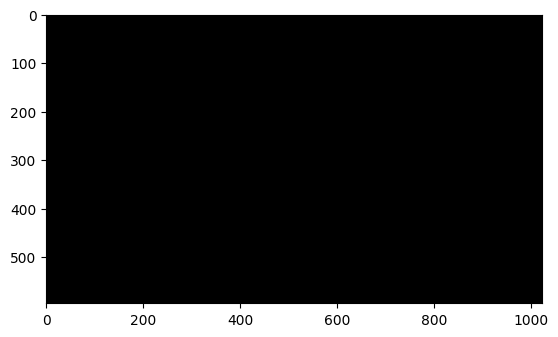

Center of mass: (0, 0)


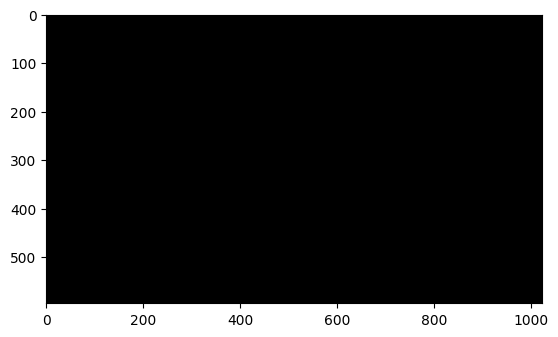

Center of mass: (0, 0)


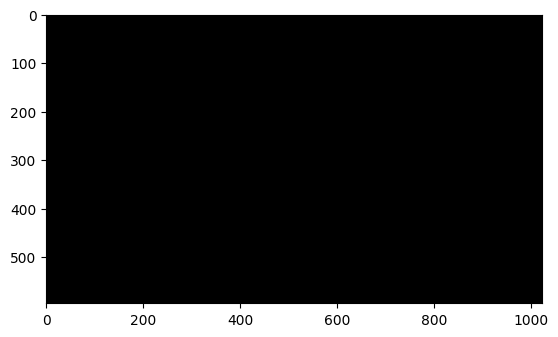

Center of mass: (0, 0)


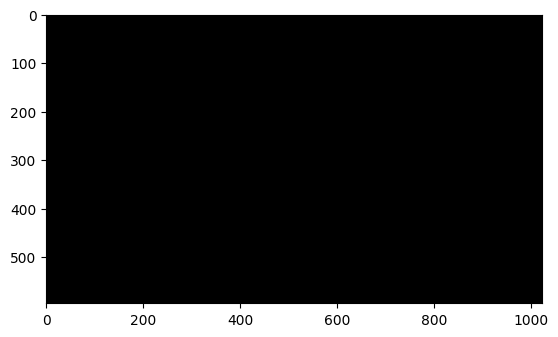

Center of mass: (0, 0)


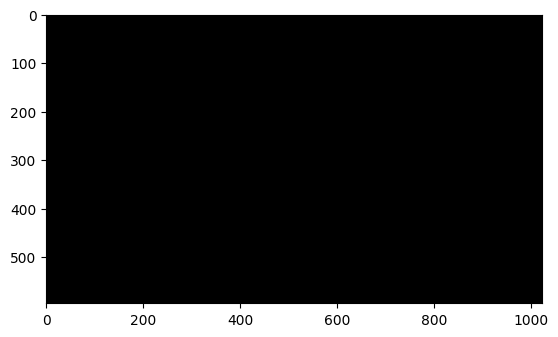

Center of mass: (0, 0)


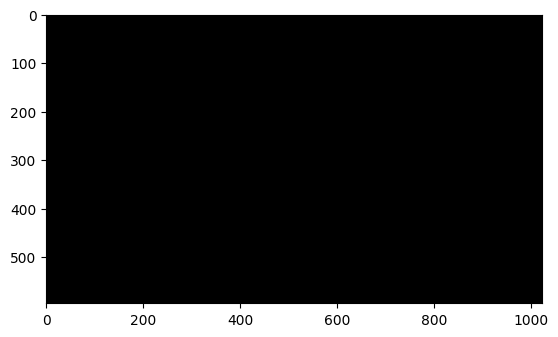

Center of mass: (0, 0)


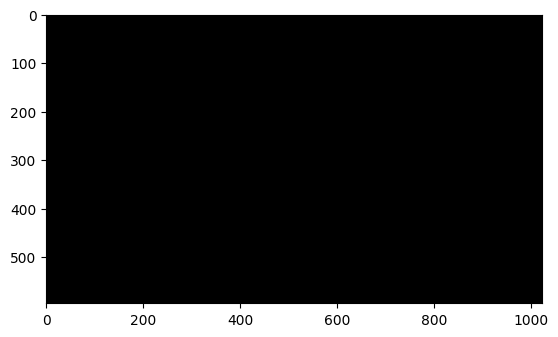

Center of mass: (0, 0)


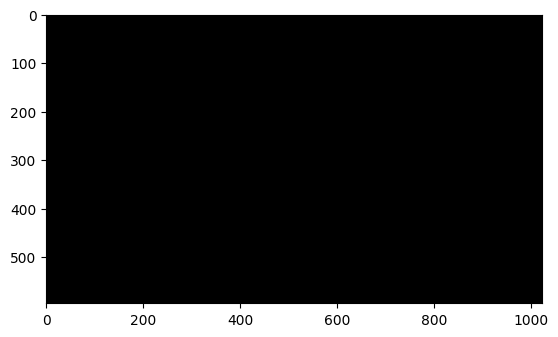

Center of mass: (0, 0)


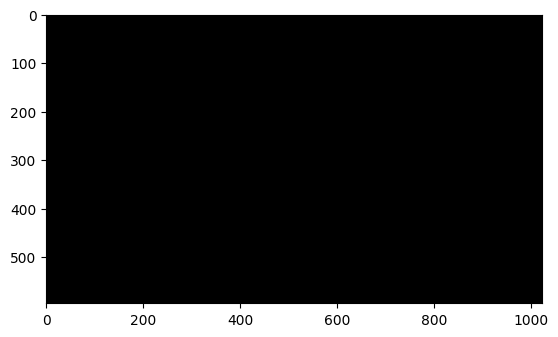

Center of mass: (0, 0)


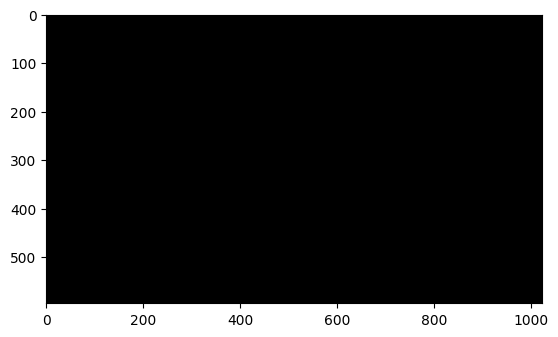

Center of mass: (0, 0)


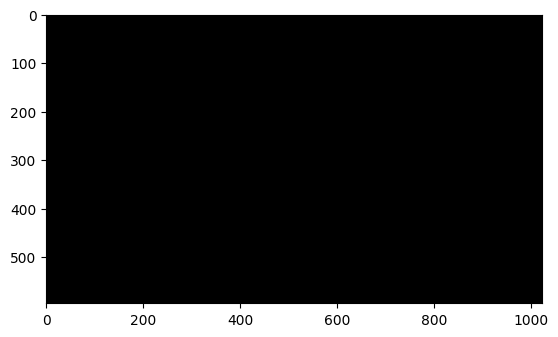

Center of mass: (0, 0)


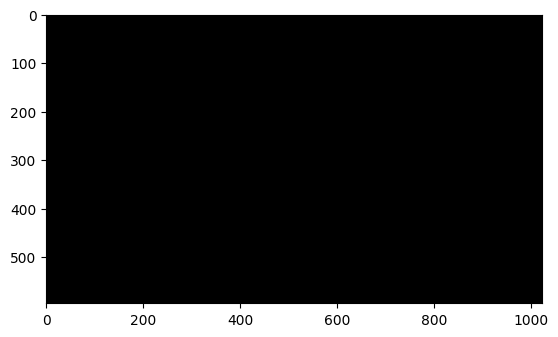

Center of mass: (0, 0)


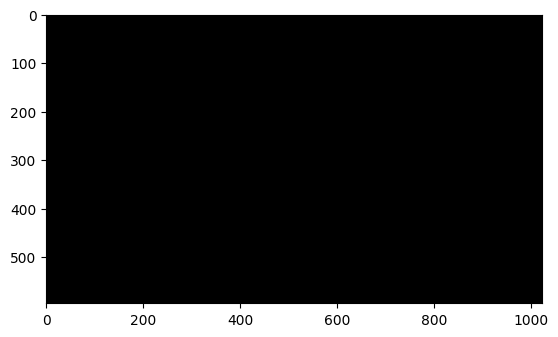

Center of mass: (0, 0)


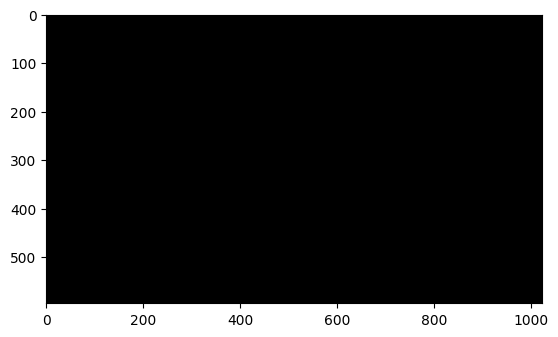

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (555, 285)


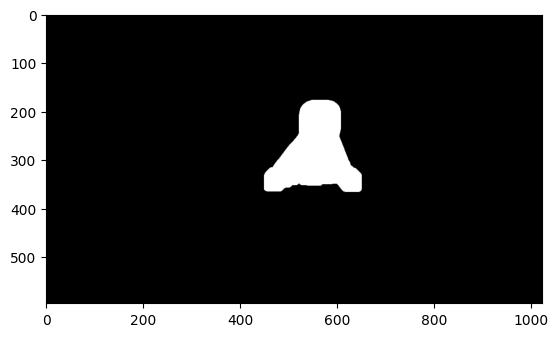

Center of mass: (0, 0)


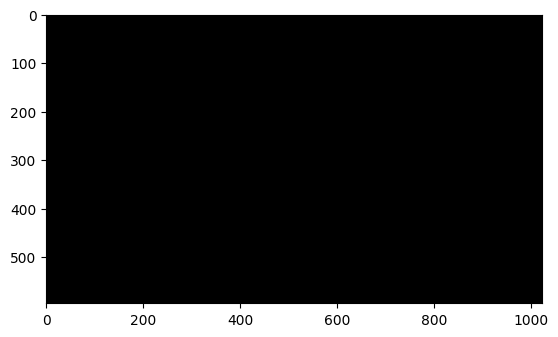

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (555, 287)


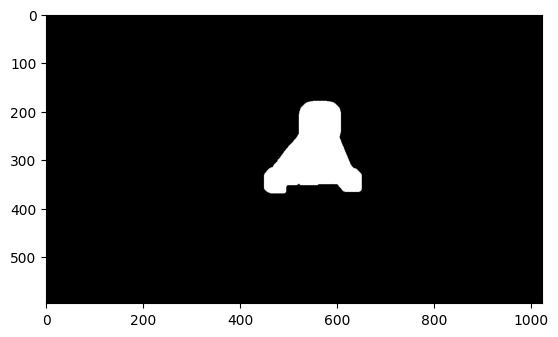

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (556, 287)


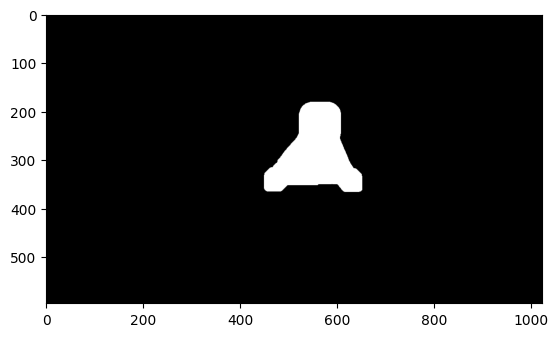

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (555, 288)


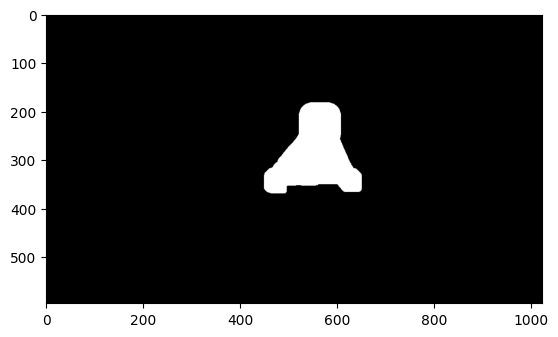

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (555, 288)


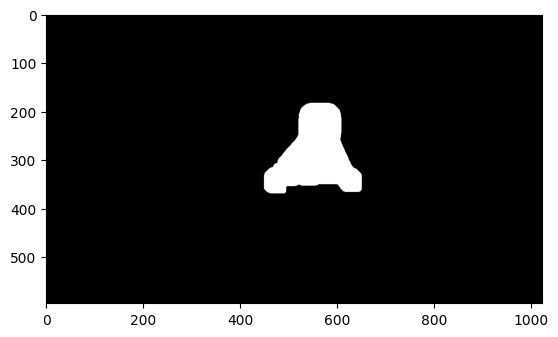

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Center of mass: (554, 289)


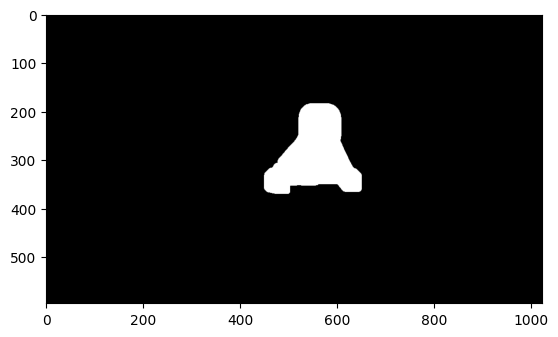

KeyboardInterrupt: 

In [17]:
for i in list_photos:
    # Load the image
    img = i

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blurring to remove noise
    blur = cv2.GaussianBlur(gray, (7,7), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blur, 200, 230)

    # Apply Gaussian blurring to remove noise
    blur = cv2.GaussianBlur(gray, (7,7), 0)

    # Apply Canny edge detection with the current parameters
    edges = cv2.Canny(blur, 100, 200)

    # Perform closing operation to close the contour
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

    # Dilate the contours
    kernel = np.ones((5,5), np.uint8)
    dilated = cv2.dilate(closed, kernel, iterations=3)

    # Find the contours in the binary image
    contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw the contours on a copy of the original image
    contour_img = img.copy()
    zeroes = np.zeros(contour_img.shape)
    cv2.drawContours(zeroes, contours, -1, (0, 255, 0), 2)

    new_img = shaded_contours(zeroes, 10000, 20000)
    new_img = cv2.GaussianBlur(new_img, (7,7), 0)

    # Find the moments of the contour image
# Convert the image to grayscale
# Convert the input image to grayscale
# Convert the input image to grayscale
# Convert the image to grayscale
    gray_img = cv2.cvtColor(new_img.astype(np.uint8), cv2.COLOR_BGR2GRAY)

# Convert the image to a single-channel 8-bit image
    gray_img = cv2.convertScaleAbs(gray_img)


# Find the moments of the contour image
    M = cv2.moments(gray_img)

# Calculate the center of mass
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0

# Print the center of mass
    print("Center of mass: ({}, {})".format(cX, cY))


    plt.imshow(new_img)
    plt.show()
